# Проект: классификация

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif

## Часть 1. Знакомство с данными, обработка пропусков и выбросов

### Задание 1

In [2]:
df = pd.read_csv('/bank_fin.csv', sep = ';')
df.head(500)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,"2 343,00 $",yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,"45,00 $",no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,"1 270,00 $",yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,"2 476,00 $",yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,"184,00 $",no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,31,management,divorced,tertiary,no,"294,00 $",yes,no,cellular,17,jul,536,5,-1,0,unknown,yes
496,27,services,married,secondary,no,0 $,yes,no,cellular,17,jul,991,5,-1,0,unknown,yes
497,44,blue-collar,single,secondary,no,"292,00 $",no,yes,cellular,17,jul,1153,4,-1,0,unknown,yes
498,40,entrepreneur,divorced,secondary,no,"2 998,00 $",yes,no,cellular,18,jul,623,3,-1,0,unknown,yes


In [3]:
# исследуйте данные на предмет пропусков. Где есть пропущенные значения? Сколько их?
df.isna().sum()


age           0
job           0
marital       0
education     0
default       0
balance      25
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB


### Задание 2

In [5]:
# есть ли в признаке job пропущенные значения? Возможно, они обозначены каким-то специальным словом?
df['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

### Задание 3

In [6]:
# преобразуйте признак balance таким образом, чтобы он корректно считывался, как вещественное число (float)
df['balance']=df['balance'].apply(lambda x: str(x).replace('$','').replace(',','').replace(' ',''))
df['balance'] = df['balance'].astype('float')
df['balance']=df['balance']/100
df.head(500)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,31,management,divorced,tertiary,no,294.0,yes,no,cellular,17,jul,536,5,-1,0,unknown,yes
496,27,services,married,secondary,no,0.0,yes,no,cellular,17,jul,991,5,-1,0,unknown,yes
497,44,blue-collar,single,secondary,no,292.0,no,yes,cellular,17,jul,1153,4,-1,0,unknown,yes
498,40,entrepreneur,divorced,secondary,no,2998.0,yes,no,cellular,18,jul,623,3,-1,0,unknown,yes


In [7]:
round(df['balance'].mean(),3)

1529.129

### Задание 4

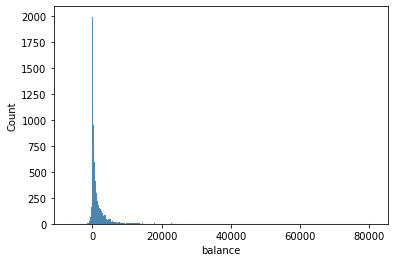

In [8]:
sns.histplot(data=df, x="balance")

In [9]:
# обработайте пропуски в признаки balance , заменив их на медианные значения по данному признаку
values = {
    'balance': df['balance'].median()
}
#заполняем пропуски в соответствии с заявленным словарем
df = df.fillna(values)

In [10]:
round(df['balance'].mean(),3)

1526.936

### Задание 5

In [11]:
# обработайте пропуски в категориальных признаках: job и education, заменив их на модальные значения
#df['job'].value_counts()
unknown='unknown'
job_modal_value = str(df['job'].mode(dropna=True)[0])
education_modal_value = str(df['education'].mode(dropna=True)[0])
df['job'] = df['job'].apply(lambda x: x if x != unknown else job_modal_value)
df['education'] = df['education'].apply(lambda x: x if x != unknown else education_modal_value)

In [12]:
job_modal_value = str(df['job'].mode(dropna=True)[0])
print(job_modal_value)

management


In [13]:
mask1 = (df['job']==job_modal_value) & (df['education']==education_modal_value)
pop_df = df[mask1]
pop_df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
37,33,management,divorced,secondary,no,5.0,yes,no,unknown,13,may,1346,1,-1,0,unknown,yes
44,52,management,married,secondary,no,2240.0,yes,no,unknown,13,may,845,1,-1,0,unknown,yes
89,37,management,single,secondary,no,792.0,yes,no,unknown,16,may,1187,4,-1,0,unknown,yes
159,28,management,married,secondary,no,292.0,yes,no,unknown,28,may,507,1,-1,0,unknown,yes
180,37,management,divorced,secondary,no,16.0,yes,no,unknown,30,may,638,1,-1,0,unknown,yes


In [14]:
avg_ballance = round(pop_df['balance'].mean(), 3)
print(f'Avarage Balance: {avg_ballance}')

Avarage Balance: 1598.883


### Задание 6

In [15]:
# удалите все выбросы для признака balance
median=df['balance'].median()
#q1=df['balance'].quantile(0.25)
#q3=df['balance'].quantile(0.75)
q1=np.percentile(df['balance'], 25)
q3=np.percentile(df['balance'], 75)

iqr = q3 - q1
lower_bound = q1 - (iqr * 1.5)
upper_bound = q3 + (iqr * 1.5)

print(f'iqr{iqr} -LowBound:{lower_bound} - UpperBound:{upper_bound} median: {median}')

mask2 = (df['balance']>=lower_bound) & (df['balance'] <= upper_bound)
df_cleaned = df[mask2]
df_cleaned.shape

iqr1576.0 -LowBound:-2241.0 - UpperBound:4063.0 median: 550.0


(10105, 17)

## Часть 2:  Разведывательный анализ

### Задание 1

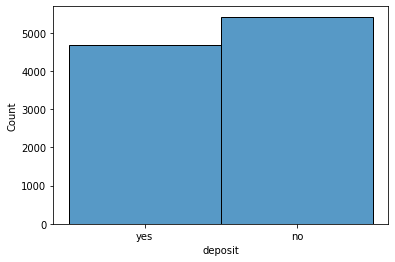

In [16]:
# изучите соотношение классов в ваших данных на предмет несбалансированности, проиллюстрируйте результат
dfc = df_cleaned
sns.histplot(data=dfc, x="deposit")

In [17]:
dfc['deposit'].value_counts()
#df[df['deposit']=='yes'].shape[0]

no     5424
yes    4681
Name: deposit, dtype: int64

### Задания 2 и 3

In [18]:
#рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат
dfc.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000
mean,40.895497,807.653538,15.590302,368.742603,2.517170,51.319644,0.816230
std,11.734931,994.151966,8.441510,346.651524,2.707159,109.644179,2.243795
min,18.000000,-2049.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,95.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,38.000000,445.000000,15.000000,252.000000,2.000000,-1.000000,0.000000
75%,48.000000,1227.000000,22.000000,490.000000,3.000000,2.000000,1.000000
max,95.000000,4063.000000,31.000000,3881.000000,43.000000,854.000000,58.000000


### Задания 4 и 5

In [19]:
#рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат
#ваш код
#постройте визуализации, иллюстрирующие результаты

In [20]:
#!pip install pandas-profiling --upgrade
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 57.1 MB/s eta 0:00:00


In [21]:
import sweetviz as sv
report = sv.analyze(dfc)
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Задание 6

In [22]:
# Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.
g =dfc.groupby(['poutcome', 'deposit', 'month']).agg(['count'])
g.head()

age   job marital education default balance housing  \
                       count count   count     count   count   count   count   
poutcome deposit month                                                         
failure  no      apr      84    84      84        84      84      84      84   
                 aug      19    19      19        19      19      19      19   
                 dec       2     2       2         2       2       2       2   
                 feb      71    71      71        71      71      71      71   
                 jan      30    30      30        30      30      30      30   

                        loan contact   day duration campaign pdays previous  
                       count   count count    count    count count    count  
poutcome deposit month                                                       
failure  no      apr      84      84    84       84       84    84       84  
                 aug      19      19    19       19       19    19       19  
                 dec       2       2     2        2        2     2        2  
                 feb      71      71    71       71       71    71       71  
                 jan      30      30    30       30       30    30       30

### Задание 7

In [23]:
# узнайте, в каком месяце чаще всего отказывались от предложения открыть депозит
for index in np.unique(dfc.month):
    print(index, dfc[(dfc.month == index)&(dfc.deposit == 'no')].shape[0]/dfc[(dfc.month == index)].shape[0])

apr 0.3819277108433735
aug 0.5595667870036101
dec 0.0967741935483871
feb 0.45557122708039494
jan 0.6081504702194357
jul 0.5895627644569816
jun 0.5489130434782609
mar 0.10126582278481013
may 0.6786396637371036
nov 0.5846153846153846
oct 0.18507462686567164
sep 0.16546762589928057


### Задание 8

In [24]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения
# def create_group(age):
#   if age < 30:
#     return '<30'
#   if 30 <= age < 40:
#     return '30-40'
#   if 40 <= age < 50:
#     return '40-50'
#   if 50 <= age < 60:
#     return '50-60'
#   return '60+'
# dfc['age_group']=dfc['age'].apply(create_group)

dfc['age_group'] = pd.cut(dfc.age, [0,30,40,50,60,9999], labels = ['<30','30-40','40-50','50-60','60+'])

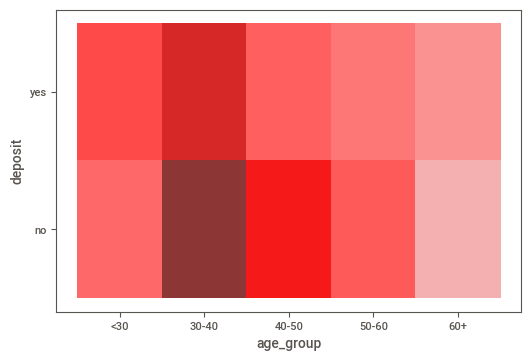

In [25]:
sns.histplot(
    data=dfc,
    x='age_group',
    y='deposit',
    color='red'
);

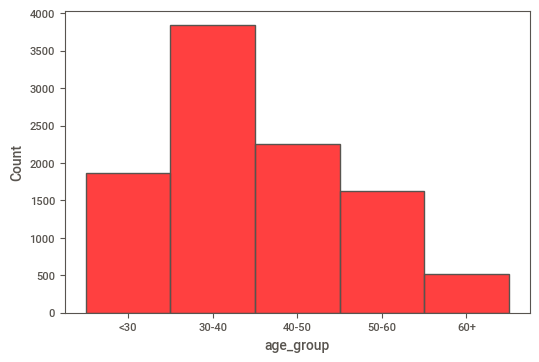

In [26]:
sns.histplot(
    data=dfc,
    x='age_group',
    bins=25,
    color='red'
);

### Задания 9 и 10

In [27]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от семейного статуса
pivot_martial = dfc.pivot_table(
    values='age',
    index='deposit',
    columns='marital',
    aggfunc='count'
)
pivot_martial

marital,divorced,married,single
deposit,,,
no,624,3303,1497
yes,553,2412,1716


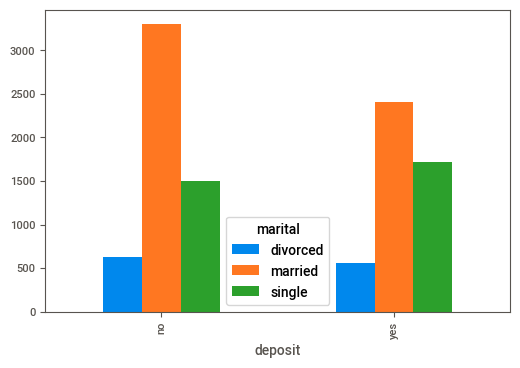

In [28]:
pivot_martial.plot(kind="bar")

In [29]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от образования
pivot_education = dfc.pivot_table(
    values='age',
    index='deposit',
    columns='education',
    aggfunc='count'
)
pivot_education

education,primary,secondary,tertiary
deposit,,,
no,832,3066,1526
yes,517,2451,1713


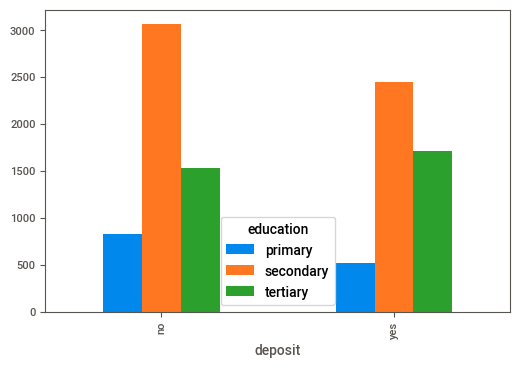

In [30]:
pivot_education.plot(kind="bar")

In [31]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от вида профессиональной занятости
pivot_job = dfc.pivot_table(
    values='age',
    index='deposit',
    columns='job',
    aggfunc='count'
)
pivot_job

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
deposit,,,,,,,,,,,
no,672,1155,189,153,1180,231,197,523,81,900,143
yes,574,652,111,99,1135,432,161,345,245,738,189


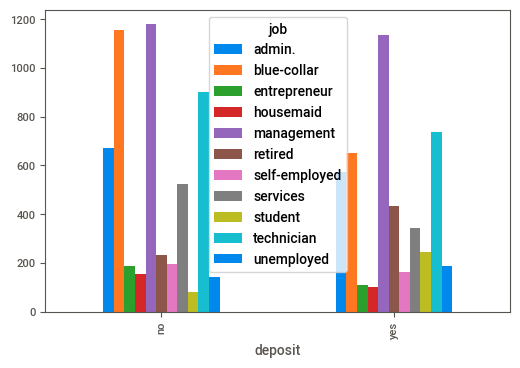

In [32]:
pivot_job.plot(kind="bar")

### Задание 11

In [33]:
# постройте сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны
#(если рассматривать тех, кто открыл депозит)
fdc_yes = dfc[dfc['deposit']=='yes']
fdc_no = dfc[dfc['deposit']=='no']
pivot_count_yes = fdc_yes.pivot_table(
    values='age',
    index='deposit',
    columns='marital',
    aggfunc='count'
)
pivot_count_yes

marital,divorced,married,single
deposit,,,
yes,553,2412,1716


In [34]:
pivot_count_no = fdc_no.pivot_table(
    values='age',
    index='deposit',
    columns='marital',
    aggfunc='count'
)
pivot_count_no

marital,divorced,married,single
deposit,,,
no,624,3303,1497


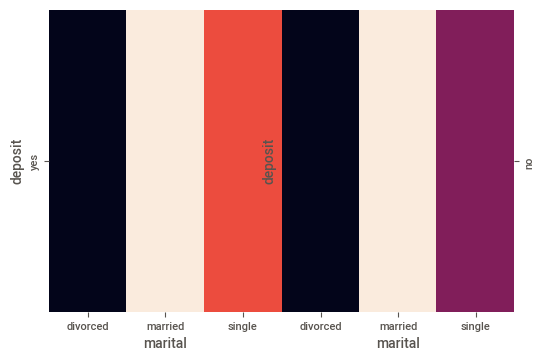

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.subplots_adjust(wspace=0.01)

sns.heatmap(pivot_count_yes,  ax=ax1, cbar=False)
sns.heatmap(pivot_count_no,  ax=ax2, cbar=False)
ax2.yaxis.tick_right()

fig.subplots_adjust(wspace=0.001)

## Часть 3: преобразование данных

### Задание 1

In [36]:
# преобразуйте уровни образования
import pandas as pd 
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
# Создание экземпляра класса LabelEncoder()
lab_enc = LabelEncoder()
# Кодирование признака
dfc['education'] = lab_enc.fit_transform(dfc['education'])
dfc['education'].sum()

11995

In [37]:
#перекодируем порядковую переменную для возраста
dfc['age_group'] = lab_enc.fit_transform(dfc['age_group'])

### Задания 2 и 3

In [38]:
# преобразуйте бинарные переменные в представление из нулей и единиц
dfc['deposit']=dfc['deposit'].replace({'yes': 1,'no': 0})
dfc['housing']=dfc['housing'].replace({'yes': 1,'no': 0})
dfc['loan']=dfc['loan'].replace({'yes': 1,'no': 0})
dfc['default']=dfc['default'].replace({'yes': 1,'no': 0})
dfc

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_group
0,59,admin.,married,1,0,2343.0,1,0,unknown,5,may,1042,1,-1,0,unknown,1,2
1,56,admin.,married,1,0,45.0,0,0,unknown,5,may,1467,1,-1,0,unknown,1,2
2,41,technician,married,1,0,1270.0,1,0,unknown,5,may,1389,1,-1,0,unknown,1,1
3,55,services,married,1,0,2476.0,1,0,unknown,5,may,579,1,-1,0,unknown,1,2
4,54,admin.,married,2,0,184.0,0,0,unknown,5,may,673,2,-1,0,unknown,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,0,0,1.0,1,0,cellular,20,apr,257,1,-1,0,unknown,0,0
11158,39,services,married,1,0,733.0,0,0,unknown,16,jun,83,4,-1,0,unknown,0,0
11159,32,technician,single,1,0,29.0,0,0,cellular,19,aug,156,2,-1,0,unknown,0,0
11160,43,technician,married,1,0,0.0,0,1,cellular,8,may,9,2,172,5,failure,0,1


In [39]:
round(dfc['deposit'].std(),3)

0.499

In [40]:
summ = (dfc['default'].mean(axis= 0)+dfc['housing'].mean(axis= 0)+dfc['loan'].mean(axis= 0))
round(summ,3)

0.635

### Задание 4

In [41]:
# создайте дамми-переменные
dummy_cols = ['job','marital','contact','month','poutcome']
dfc_dummy_cols = pd.get_dummies(dfc, columns=dummy_cols)

In [42]:
#Сколько теперь всего признаков в датасете, не считая целевую переменную? Введите ответ, посчитав уже добавленные dummy-переменные, но до удаления номинальных.
dfc_dummy_cols.shape[1]-1+len(dummy_cols)

50

In [43]:
dfc=dfc_dummy_cols

### Задания 5 и 6

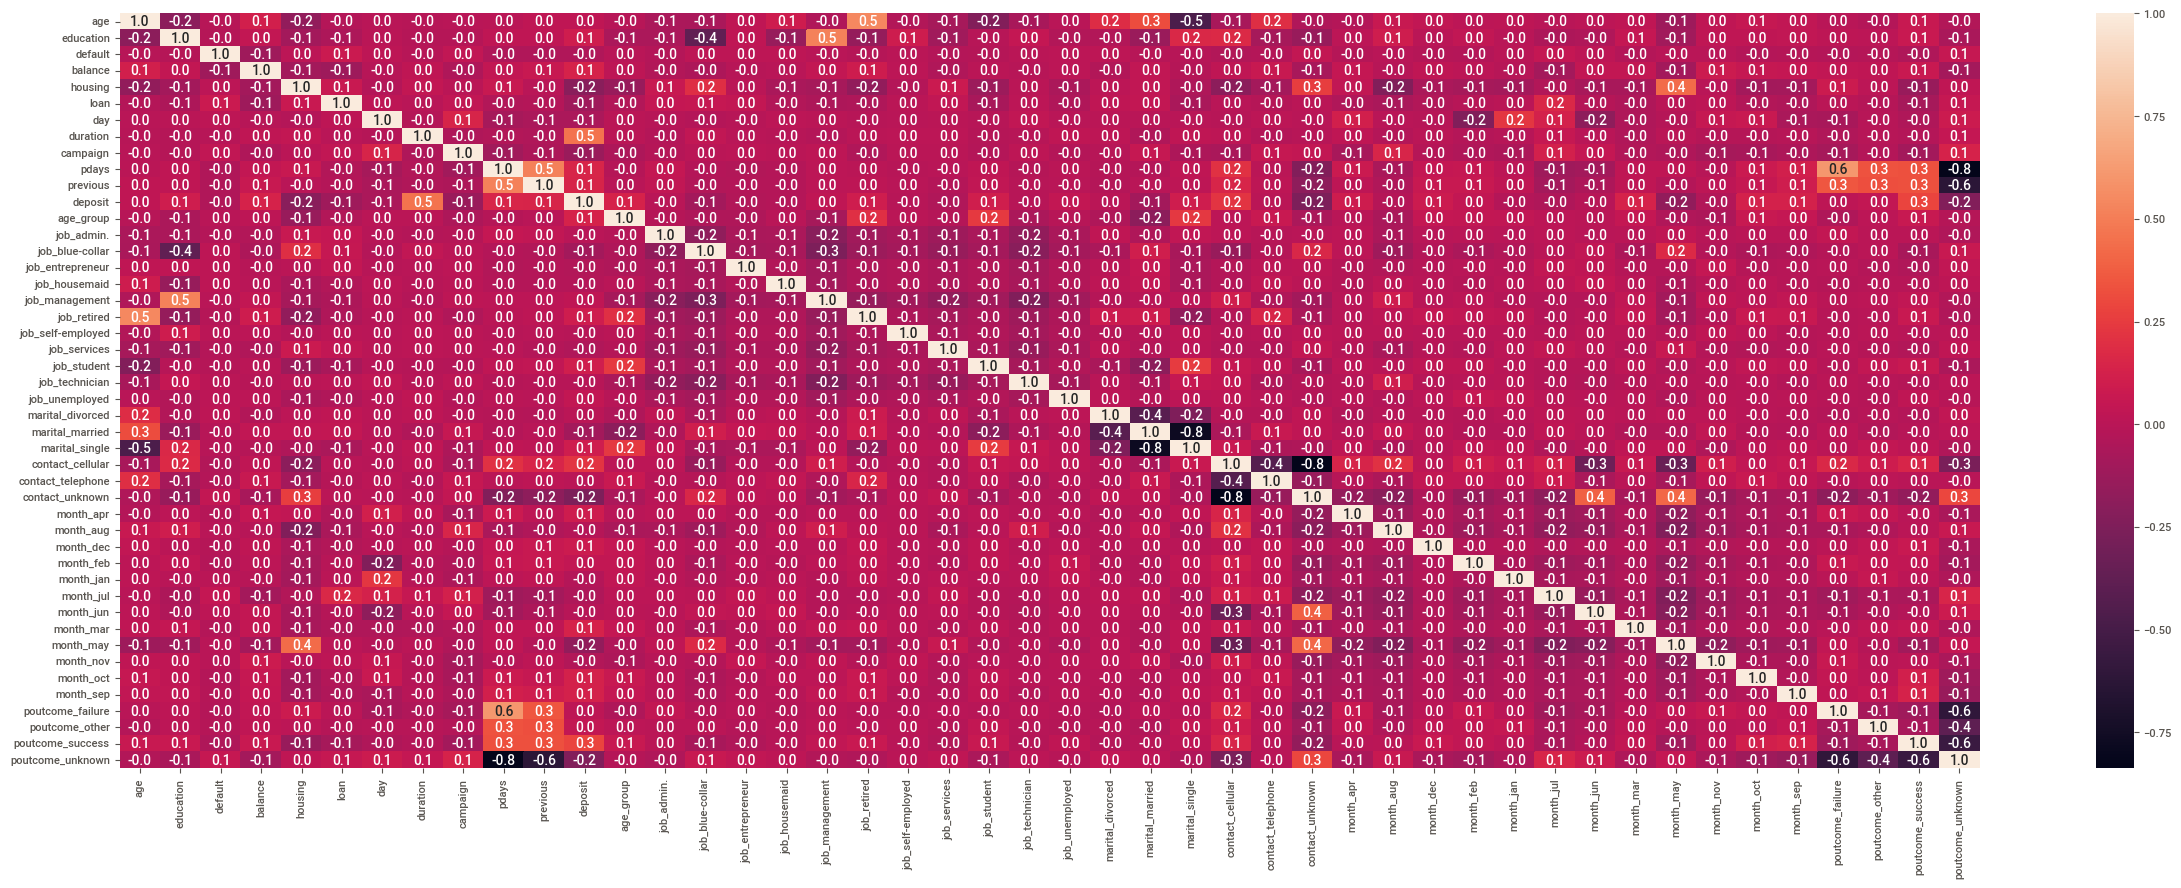

In [44]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарности
fig, ax = plt.subplots(figsize=(30,10))
sns.heatmap(dfc.corr(), annot=True, fmt=".1f")

### Задания 7 и 8

In [45]:
X = dfc.drop(['deposit'], axis=1)
y = dfc['deposit']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [46]:
# рассчитайте необходимые показатели
print(f"Shape:{X_test.shape} Mean:{round(y_test.mean(),2)}")

Shape:(3335, 45) Mean:0.46


### Задание 9

In [47]:
# с помощью SelectKBest отберите 15 наиболее подходящих признаков
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
selector = SelectKBest(f_classif, k=15)
selector.fit(X_train, y_train)
best_columns = selector.get_feature_names_out()
best_columns

array(['balance', 'housing', 'duration', 'campaign', 'pdays', 'previous',
       'age_group', 'contact_cellular', 'contact_unknown', 'month_mar',
       'month_may', 'month_oct', 'month_sep', 'poutcome_success',
       'poutcome_unknown'], dtype=object)

In [48]:
#Создам датасет с наилушими предикторами
X = dfc[best_columns]
y = dfc['deposit']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

### Задание 10

In [49]:
# нормализуйте данные с помощью minmaxsxaler
import numpy as np
from sklearn import preprocessing
# Создание экземпляра класса MinMaxScaler(), диапазон {0,1}
minmax_scaler = preprocessing.MinMaxScaler()
minmax_scaler.fit(X_train)
# Масштабирование признака
X_test_scaled = minmax_scaler.transform(X_test)
X_train_scaled = minmax_scaler.transform(X_train)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [50]:
#Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из тестовой выборки. Ответ округлите до двух знаков после точки-разделителя.
round(X_test_scaled.iloc[:,0].mean(),2)

0.47

# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [51]:
# обучите логистическую регрессию и рассчитайте метрики качества
from sklearn import linear_model #линейные модели
#Создаем объект класса логистическая регрессия
log_reg = linear_model.LogisticRegression(
    solver='sag', #алгоритм оптимизации
    random_state=42, #генератор случайных чисел
    max_iter=1000 #количество итераций на сходимость
)
#Обучаем модель, минимизируя logloss
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='sag')

In [52]:
#Делаем предсказание для тренировочной выборки
y_train_pred = log_reg.predict(X_train_scaled)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_train, y_train_pred))
#Делаем предсказание для тестовой выборки
y_test_pred = log_reg.predict(X_test_scaled)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_test, y_test_pred))
print(f'Accuracy test: {round(metrics.accuracy_score(y_test, y_test_pred),2)}')

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      3634
           1       0.84      0.76      0.80      3136

    accuracy                           0.82      6770
   macro avg       0.83      0.82      0.82      6770
weighted avg       0.83      0.82      0.82      6770

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1790
           1       0.83      0.74      0.78      1545

    accuracy                           0.81      3335
   macro avg       0.81      0.80      0.81      3335
weighted avg       0.81      0.81      0.81      3335

Accuracy test: 0.81


### Задания 2,3,4

In [53]:
# обучите решающие деревья, настройте максимальную глубину
#Создаём объект класса DecisionTreeClassifier
dt_clf = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    random_state=42 #генератор случайных чисел
)
#Обучаем дерево решений по алгоритму CART без ограничения его длины
dt_clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [54]:
#Делаем предсказание для тренировочной выборки
y_train_pred = dt_clf.predict(X_train_scaled)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_train, y_train_pred))
#Делаем предсказание для тестовой выборки
y_test_pred = dt_clf.predict(X_test_scaled)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3634
           1       1.00      1.00      1.00      3136

    accuracy                           1.00      6770
   macro avg       1.00      1.00      1.00      6770
weighted avg       1.00      1.00      1.00      6770

              precision    recall  f1-score   support

           0       0.76      0.77      0.77      1790
           1       0.73      0.72      0.73      1545

    accuracy                           0.75      3335
   macro avg       0.75      0.75      0.75      3335
weighted avg       0.75      0.75      0.75      3335



In [55]:
# #Создаём фигуру для визуализации графа
# fig = plt.figure(figsize=(30, 20))
# #Строим граф 
# tree_graph = tree.plot_tree(
#     dt_clf, #объект обученного дерева
#     feature_names=X_train_scaled.columns, #наименования факторов
#     #class_names=["0 - Not diabetic", "1 - Diabetic"], #имена классов
#     filled=True, #расцветка графа
# );

In [56]:
#Создадим списки, в которых будем хранить значения метрик 
accuracy_scores = []
recall_scores = []
precision_scores = []
f1_scores = []
#Сгенерируем набор вероятностных порогов в диапазоне от 0.1 до 1
depths = np.arange(2, 50, 1)

for depth in depths:
    dt_clf = tree.DecisionTreeClassifier(
                                        criterion='entropy', #критерий информативности
                                        random_state=42, #генератор случайных чисел
                                        max_depth=depth
                                      )
    dt_clf.fit(X_train_scaled, y_train)
    y_test_pred = dt_clf.predict(X_test_scaled)
    #Считаем метрики и добавляем их в списки
    recall_scores.append(metrics.recall_score(y_test, y_test_pred))
    precision_scores.append(metrics.precision_score(y_test, y_test_pred))
    f1_scores.append(metrics.f1_score(y_test, y_test_pred))
    accuracy_scores.append(metrics.accuracy_score(y_test, y_test_pred))
    #print(f1_scores)

In [57]:
round(max(accuracy_scores),2)

0.81

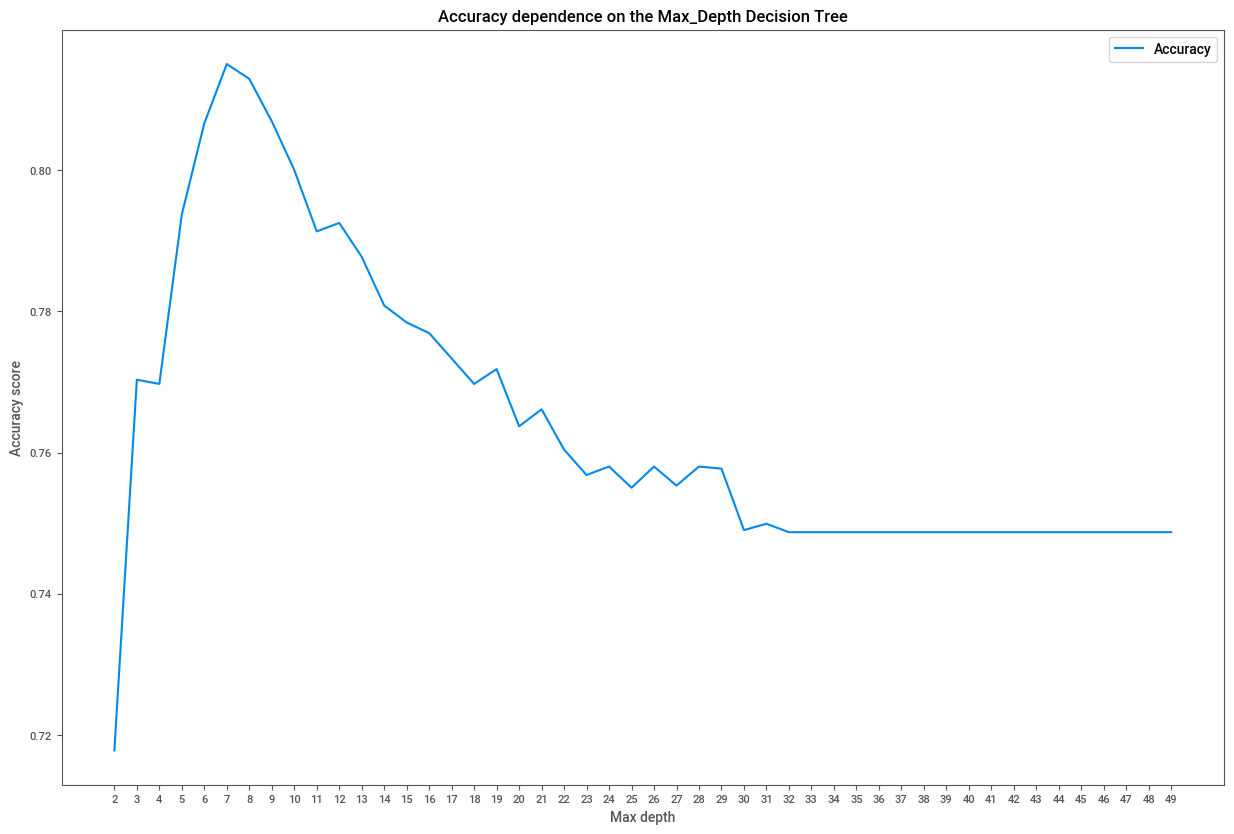

In [58]:
#Визуализируем метрики при различных threshold
fig, ax = plt.subplots(figsize=(15, 10)) #фигура + координатная плоскость
ax.plot(depths, accuracy_scores, label='Accuracy')

#Даём графику название и подписываем оси
ax.set_title('Accuracy dependence on the Max_Depth Decision Tree')
ax.set_xlabel('Max depth')
ax.set_ylabel('Accuracy score')
#Устанавливаем отметки по оси x
ax.set_xticks(depths) 
#Отображаем легенду
ax.legend();

### Задание 5

In [59]:
# подберите оптимальные параметры с помощью gridsearch
from sklearn.model_selection import GridSearchCV
param_grid = {'min_samples_split': [2, 5, 7, 10] ,
              'max_depth':[3,5,6,7]},

grid_search = GridSearchCV(
    estimator=tree.DecisionTreeClassifier(
                                        criterion='entropy', #критерий информативности
                                        random_state=42, #генератор случайных чисел
                                      ),
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1
)  
grid_search.fit(X_train_scaled, y_train) 
print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))

y_test_pred = grid_search.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Наилучшие значения гиперпараметров: {'max_depth': 7, 'min_samples_split': 10}
f1_score на тестовом наборе: 0.80


# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [67]:
# обучите на ваших данных случайный лес
from sklearn import ensemble
#Создаём объект класса RandomForestClassifier
rf_clf_2d = ensemble.RandomForestClassifier(
    n_estimators=100, #число деревьев
    criterion='gini', #критерий эффективности
    min_samples_leaf = 5,
    max_depth=10, #максимальная глубина дерева
    random_state=42 #генератор случайных чисел
)

#Обучаем модель 
rf_clf_2d.fit(X_train_scaled, y_train)
 
#Делаем предсказание класса
y_test_pred = rf_clf_2d.predict(X_test_scaled)
#Выводим отчёт о метриках
print(metrics.classification_report(y_test, y_test_pred))
print('Accuracy на тестовом наборе: {:.2f}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print('Recall на тестовом наборе: {:.2f}'.format(metrics.recall_score(y_test, y_test_pred)))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1790
           1       0.80      0.83      0.82      1545

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.83      0.83      0.83      3335

Accuracy на тестовом наборе: 0.83
Recall на тестовом наборе: 0.83


### Задания 2 и 3

In [74]:
# используйте для классификации градиентный бустинг и сравните качество со случайным лесом
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

gb = GradientBoostingClassifier(
    learning_rate = 0.05,
    n_estimators = 300,
min_samples_leaf = 5,
max_depth = 5,
random_state = 42
)
gb.fit(X_train_scaled, y_train)
 
y_test_pred  = gb.predict(X_test_scaled)
print(f'f1_score на тестовом наборе: {round(metrics.f1_score(y_test, y_test_pred),2)}')

f1_score на тестовом наборе: 0.82


### Задание 4

In [78]:
# объедините уже известные вам алгоритмы с помощью стекинга 
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import RidgeCV

#Создаем список кортежей вида: (наименование модели, модель)
estimators = [
    ('gb',  gb),
    ('dt_clf',  dt_clf),
    ('log_reg',  log_reg)
]

stf = StackingClassifier(
    estimators=estimators,
    final_estimator = linear_model.LogisticRegression(
                                solver='sag', #алгоритм оптимизации
                                random_state=42, #генератор случайных чисел
                                max_iter=1000 #количество итераций на сходимость
                            )
)

stf.fit(X_train_scaled, y_train)

y_pred_stack = stf.predict(X_test_scaled)

print('Precision на тестовом наборе: {:.2f}'.format(metrics.precision_score(y_test, y_pred_stack)))

Precision на тестовом наборе: 0.81


### Задание 5

In [83]:
# оцените, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга
gb.feature_importances_

array([0.05795212, 0.04772538, 0.50710587, 0.01477693, 0.05507909,
       0.00845623, 0.03990225, 0.00358823, 0.07261403, 0.02781861,
       0.01521407, 0.01988016, 0.01352999, 0.11495825, 0.00139878])

In [84]:
gb.feature_names_in_

array(['balance', 'housing', 'duration', 'campaign', 'pdays', 'previous',
       'age_group', 'contact_cellular', 'contact_unknown', 'month_mar',
       'month_may', 'month_oct', 'month_sep', 'poutcome_success',
       'poutcome_unknown'], dtype=object)

### Задания 6,7,8

In [ ]:
# реализуйте оптимизацию гиперпараметров с помощью Optuna
%pip install optuna

In [88]:
import optuna
print("Версия Optuna: {}".format(optuna.__version__))

Версия Optuna: 3.0.5


In [89]:
random_state=42
def optuna_rf(trial):
  # задаем пространства поиска гиперпараметров
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)
  # создаем модель
  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          criterion='gini', #критерий эффективности
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=random_state)
  # обучаем модель
  model.fit(X_train, y_train)
  score = metrics.f1_score(y_train, model.predict(X_train))

  return score
  

# cоздаем объект исследования
# можем напрямую указать, что нам необходимо максимизировать метрику direction="maximize"
study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=50)

[I 2023-01-07 21:33:40,568] A new study created in memory with name: RandomForestClassifier
[I 2023-01-07 21:33:41,885] Trial 0 finished with value: 0.866770670826833 and parameters: {'n_estimators': 179, 'max_depth': 22, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.866770670826833.
[I 2023-01-07 21:33:43,175] Trial 1 finished with value: 0.8603124999999999 and parameters: {'n_estimators': 199, 'max_depth': 15, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.866770670826833.
[I 2023-01-07 21:33:44,205] Trial 2 finished with value: 0.8533916849015318 and parameters: {'n_estimators': 150, 'max_depth': 16, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.866770670826833.
[I 2023-01-07 21:33:45,928] Trial 3 finished with value: 0.849452269170579 and parameters: {'n_estimators': 186, 'max_depth': 14, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.866770670826833.
[I 2023-01-07 21:33:46,766] Trial 4 finished with value: 0.8501567398119121 and parameters: {'n_estima

In [96]:
study.best_value

0.9255419415645617

In [95]:
# создаем модель
model = ensemble.RandomForestClassifier(n_estimators=study.best_params['n_estimators'],
                                        criterion='gini', #критерий эффективности
                                        max_depth=study.best_params['max_depth'],
                                        min_samples_leaf=study.best_params['min_samples_leaf'],
                                        random_state=random_state)
# обучаем модель
model.fit(X_train_scaled, y_train)
y_test_pred=model.predict(X_test_scaled)
print(f'f1_score на тестовом наборе: {round(metrics.f1_score(y_test, y_test_pred),2)}')
print('Accuracy на тестовом наборе: {:.2f}'.format(metrics.accuracy_score(y_test, y_test_pred)))

f1_score на тестовом наборе: 0.82
Accuracy на тестовом наборе: 0.83


147